In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt


W naszych eksperymentach będziemy korzystali ze standardowego obrazka dostępnego w pakiecie PyWavelets

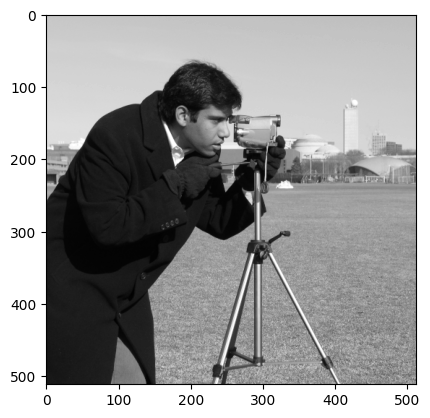

In [ ]:
# Loading image
image = pywt.data.camera()
plt.imshow(image, cmap = 'gray')

# Implementacja funkcji wykonujących kompresję falkową z kwantyzacją i tresholdingiem

Definiujemy dwie funkcje przeprowadzające kompresję falkową z kanwtyzacją oraz z progowaniem. Obie funkcje wyliczają od razu stosunek wyzerowanych współczynników do wszystkich pikseli. W obu funkcjach istnieje możliwość ustawienia zmiennej tresh_big = True - wówczas wykonane zostanie dodatkowo wyrównanie poziomów.

In [ ]:
def wavelet_compression_quant(original_image, tresh, wavelet_type,tresh_big = False, L = 3):
  coeffs = pywt.wavedec2(image, wavelet_type, level=L)  # transformata falkowa obrazka
  M = np.max(coeffs[0])
  coeffs[0] = np.round(coeffs[0]/tresh)*tresh    # kwantyzacja
  if tresh_big == True:                          # wyrównanie
    coeffs[0] = coeffs[0]*M/(M - tresh)
  zero_coeffs = np.count_nonzero(coeffs[0] == 0)
  pixels = image.size
  level = 100*zero_coeffs/pixels
  compressed_image = pywt.waverec2(coeffs, 'db8')   ## odtwarzamy obrazek
  return original_image, compressed_image, level

def wavelet_compression_tresh(original_image, tresh, wavelet_type,tresh_mode = 'soft', tresh_big = False, L = 3):
  coeffs = pywt.wavedec2(image, wavelet_type, level=L) # transformata falkowa obrazka
  M = np.max(coeffs[0])
  coeffs[0] = pywt.threshold(coeffs[0], tresh, tresh_mode, substitute=0)  # progowanie
  if tresh_big == True:                         # wyrównanie
    coeffs[0] = coeffs[0]*M/(M - tresh)
  zero_coeffs = np.count_nonzero(coeffs[0] == 0)
  pixels = image.size
  level = 100*zero_coeffs/pixels
  compressed_image = pywt.waverec2(coeffs, wavelet_type)   ## odtwarzamy obrazek
  return original_image, compressed_image, level



# Eksperymenty


### Kompresja z progowaniem miękkim



In [ ]:

original, compressed2, level2 = wavelet_compression_tresh(image, 50,tresh_mode = 'soft',
                                                          wavelet_type='db8', tresh_big = False, L = 3)
original, compressed3, level3 = wavelet_compression_tresh(image, 100,tresh_mode = 'soft',
                                                          wavelet_type='db8', tresh_big = False, L = 3)
original, compressed4, level4 = wavelet_compression_tresh(image, 200,tresh_mode = 'soft',
                                                          wavelet_type='db8', tresh_big = True, L = 3)
original, compressed5, level5 = wavelet_compression_tresh(image, 500,tresh_mode = 'soft',
                                                          wavelet_type='db8', tresh_big = True, L = 3)
original, compressed6, level6 = wavelet_compression_tresh(image, 1000,tresh_mode = 'soft',
                                                          wavelet_type='db8', tresh_big = True, L = 3)
original, compressed7, level7 = wavelet_compression_tresh(image, 1100,tresh_mode = 'soft',
                                                          wavelet_type='db8', tresh_big = True, L = 3)
original, compressed8, level8 = wavelet_compression_tresh(image, 1150,tresh_mode = 'soft',
                                                          wavelet_type='db8', tresh_big = True, L = 3)
original, compressed9, level9 = wavelet_compression_tresh(image, 1175,tresh_mode = 'soft',
                                                          wavelet_type='db8', tresh_big = True, L = 3)



106
174
699
1555
1846
1987
2175
2318


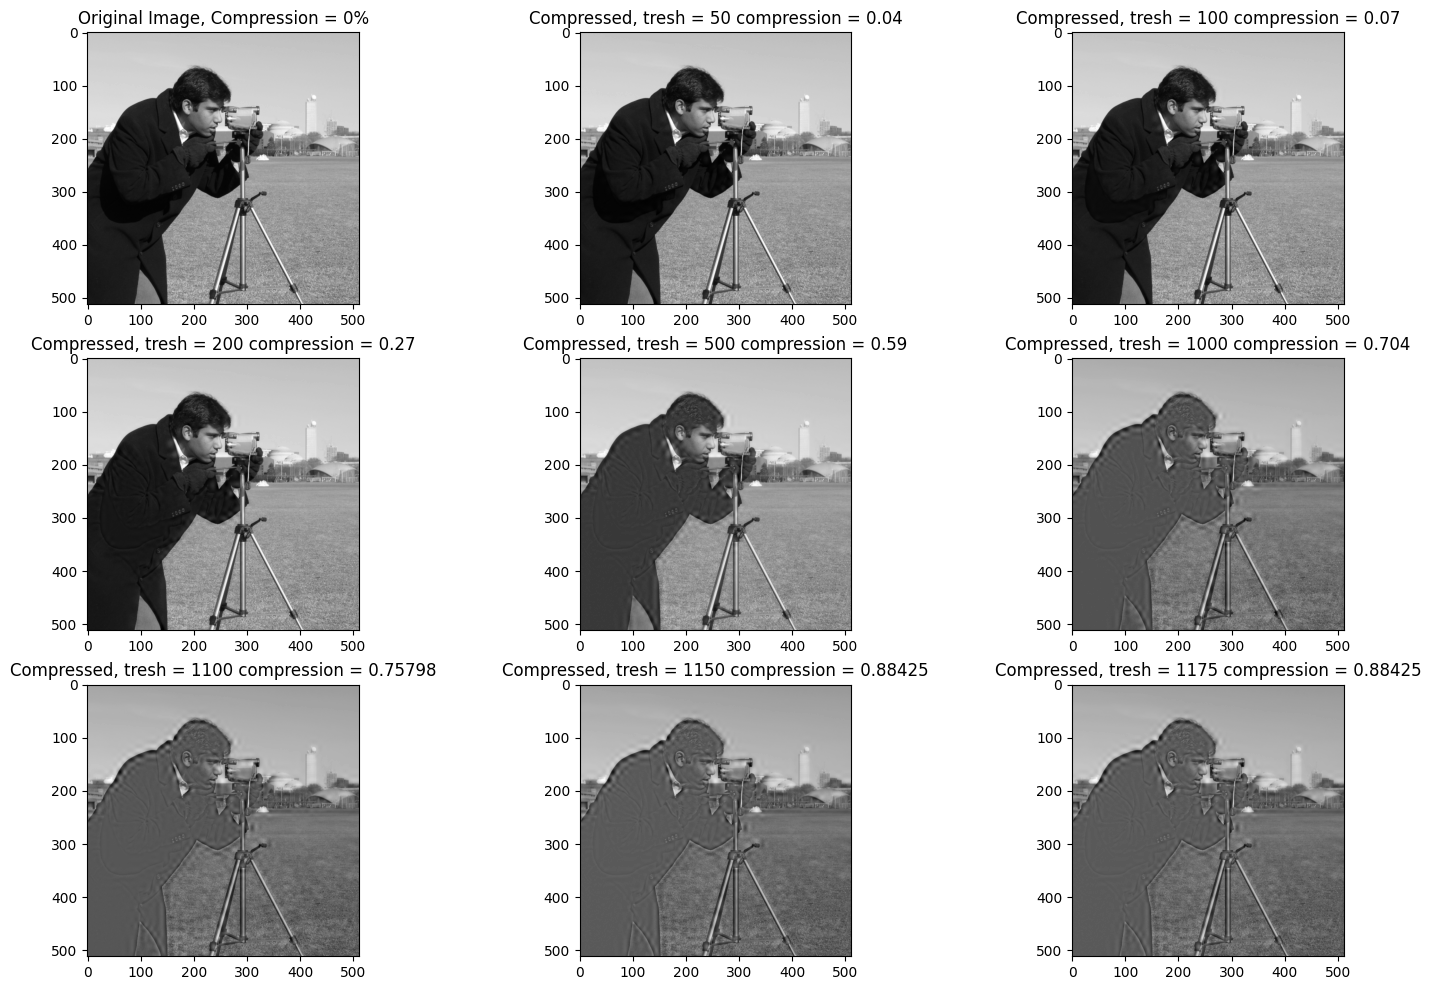

In [ ]:
rows = 3
columns = 3
fig = plt.figure(figsize=(18, 12))

fig.add_subplot(rows, columns, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image, Compression = 0%')

fig.add_subplot(rows, columns, 2)
plt.imshow(compressed2, cmap='gray')
plt.title('Compressed, tresh = 50 compression = ' +str(round(level2, 2)))
fig.add_subplot(rows, columns, 3)
plt.imshow(compressed3, cmap='gray')
plt.title('Compressed, tresh = 100 compression = ' +str(round(level3, 2)))
fig.add_subplot(rows, columns, 4)
plt.imshow(compressed4, cmap='gray')
plt.title('Compressed, tresh = 200 compression = ' +str(round(level4, 2)))
fig.add_subplot(rows, columns, 5)
plt.imshow(compressed5, cmap='gray')
plt.title('Compressed, tresh = 500 compression = ' +str(round(level5, 2)))
fig.add_subplot(rows, columns, 6)
plt.imshow(compressed6, cmap='gray')
plt.title('Compressed, tresh = 1000 compression = ' +str(round(level6,3)))
fig.add_subplot(rows, columns, 7)
plt.imshow(compressed7, cmap='gray')
plt.title('Compressed, tresh = 1100 compression = ' +str(round(level7,5)))
fig.add_subplot(rows, columns, 8)
plt.imshow(compressed8, cmap='gray')
plt.title('Compressed, tresh = 1150 compression = ' +str(round(level9,5)))
fig.add_subplot(rows, columns, 9)
plt.imshow(compressed8, cmap='gray')
plt.title('Compressed, tresh = 1175 compression = ' +str(round(level9,5)))
plt.show()


Jak widzimy nawet przywysokim stopniu kompresji krawędzie nadal są dość dobrze widoczne. Widzimy duży wzrost poziomu kompresji przyzmianie progu z tysiąc na 1150.

### Kompresja z progowaniem twardym

In [ ]:
original, compressed2, level2 = wavelet_compression_tresh(image, 50,tresh_mode = 'hard',
                                                          wavelet_type='db8', tresh_big = False, L = 3)
original, compressed3, level3 = wavelet_compression_tresh(image, 100,tresh_mode = 'hard',
                                                          wavelet_type='db8', tresh_big = False, L = 3)
original, compressed4, level4 = wavelet_compression_tresh(image, 200,tresh_mode = 'hard',
                                                          wavelet_type='db8', tresh_big = True, L = 3)
original, compressed5, level5 = wavelet_compression_tresh(image, 500,tresh_mode = 'hard',
                                                          wavelet_type='db8', tresh_big = True, L = 3)
original, compressed6, level6 = wavelet_compression_tresh(image, 1000,tresh_mode = 'hard',
                                                          wavelet_type='db8', tresh_big = True, L = 3)
original, compressed7, level7 = wavelet_compression_tresh(image, 1100,tresh_mode = 'hard',
                                                          wavelet_type='db8', tresh_big = True, L = 3)
original, compressed8, level8 = wavelet_compression_tresh(image, 1150,tresh_mode = 'hard',
                                                          wavelet_type='db8', tresh_big = True, L = 3)
original, compressed9, level9 = wavelet_compression_tresh(image, 1175,tresh_mode = 'hard',
                                                          wavelet_type='db8', tresh_big = True, L = 3)



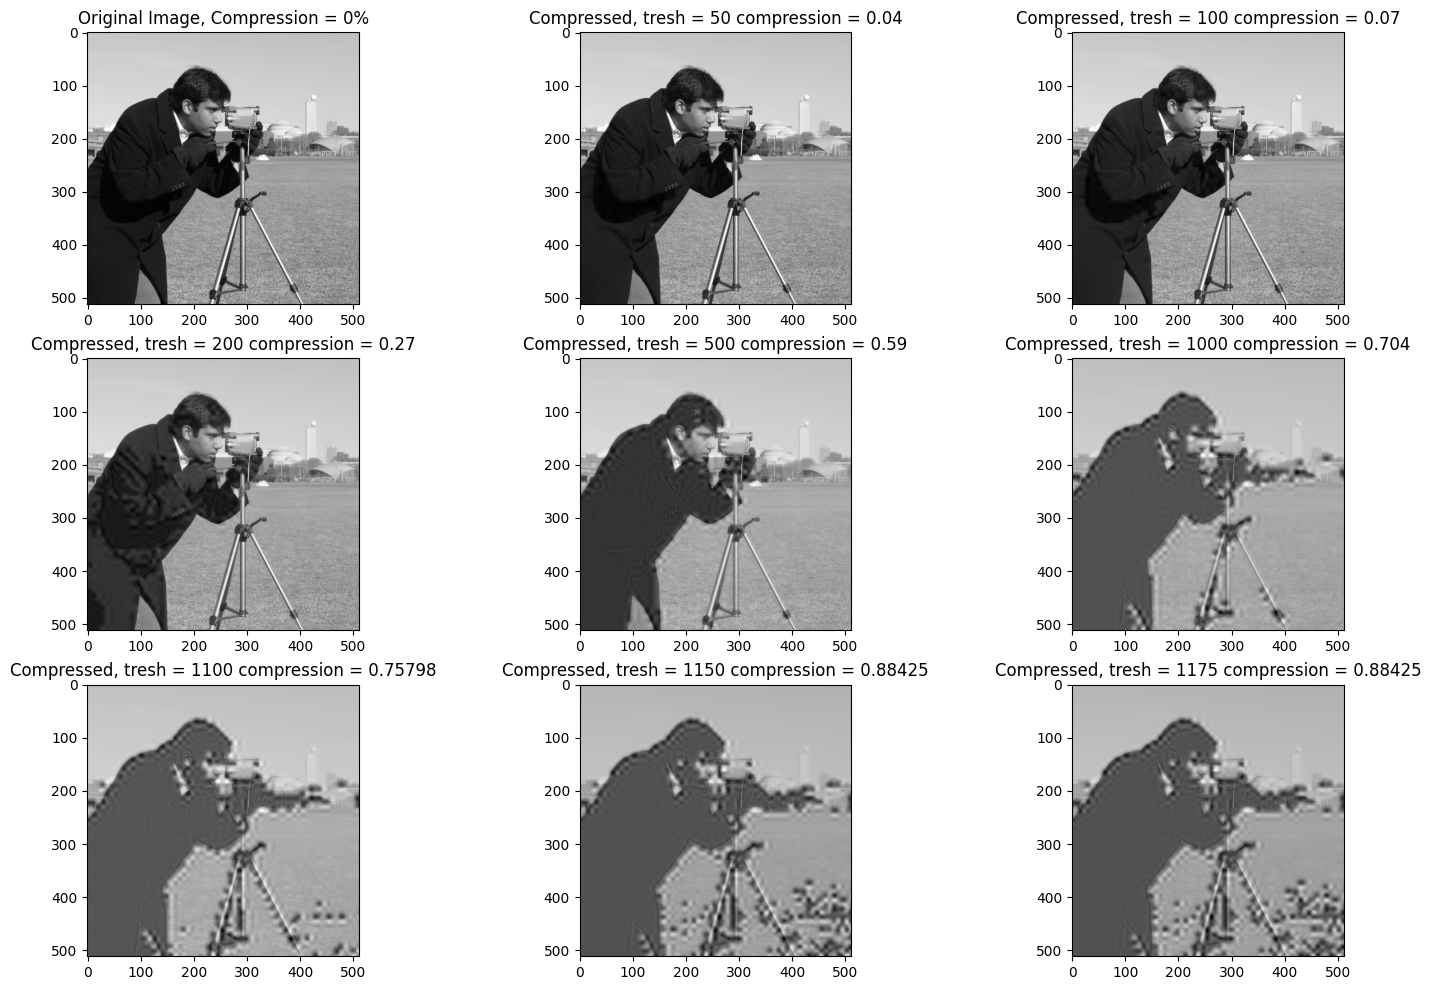

In [ ]:
rows = 3
columns = 3
fig = plt.figure(figsize=(18, 12))

fig.add_subplot(rows, columns, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image, Compression = 0%')

fig.add_subplot(rows, columns, 2)
plt.imshow(compressed2, cmap='gray')
plt.title('Compressed, tresh = 50 compression = ' +str(round(level2, 2)))
fig.add_subplot(rows, columns, 3)
plt.imshow(compressed3, cmap='gray')
plt.title('Compressed, tresh = 100 compression = ' +str(round(level3, 2)))
fig.add_subplot(rows, columns, 4)
plt.imshow(compressed4, cmap='gray')
plt.title('Compressed, tresh = 200 compression = ' +str(round(level4, 2)))
fig.add_subplot(rows, columns, 5)
plt.imshow(compressed5, cmap='gray')
plt.title('Compressed, tresh = 500 compression = ' +str(round(level5, 2)))
fig.add_subplot(rows, columns, 6)
plt.imshow(compressed6, cmap='gray')
plt.title('Compressed, tresh = 1000 compression = ' +str(round(level6,3)))
fig.add_subplot(rows, columns, 7)
plt.imshow(compressed7, cmap='gray')
plt.title('Compressed, tresh = 1100 compression = ' +str(round(level7,5)))
fig.add_subplot(rows, columns, 8)
plt.imshow(compressed8, cmap='gray')
plt.title('Compressed, tresh = 1150 compression = ' +str(round(level9,5)))
fig.add_subplot(rows, columns, 9)
plt.imshow(compressed8, cmap='gray')
plt.title('Compressed, tresh = 1175 compression = ' +str(round(level9,5)))
plt.show()

Jak widzimy w porównaniu do kompresji z progowaniem miękkim przy progu 1000 następuje znaczący spadek jakości obrazka - krawdędzie stają się dużo mniej widoczne a cały obrazek wygląda jak "zapikselowany". Dla najwyższych progów osiągamy zbliżony poziom kompresji do dla progowania miękkiego jednak przy znacząco niższej jakości obrazka.

### Kompresja z kwantyzacją

In [ ]:

original, compressed2, level2 = wavelet_compression_quant(image, 50,
                                                          wavelet_type='db8', tresh_big = False, L = 3)
original, compressed3, level3 = wavelet_compression_quant(image, 100,
                                                          wavelet_type='db8', tresh_big = False, L = 3)
original, compressed4, level4 = wavelet_compression_quant(image, 200,
                                                          wavelet_type='db8', tresh_big = True, L = 3)
original, compressed5, level5 = wavelet_compression_quant(image, 500,
                                                          wavelet_type='db8', tresh_big = True, L = 3)
original, compressed6, level6 = wavelet_compression_quant(image, 1000,
                                                          wavelet_type='db8', tresh_big = True, L = 3)
original, compressed7, level7 = wavelet_compression_quant(image, 1100,
                                                          wavelet_type='db8', tresh_big = True, L = 3)
original, compressed8, level8 = wavelet_compression_quant(image, 1150,
                                                          wavelet_type='db8', tresh_big = True, L = 3)
original, compressed9, level9 = wavelet_compression_quant(image, 1175,
                                                          wavelet_type='db8', tresh_big = True, L = 3)


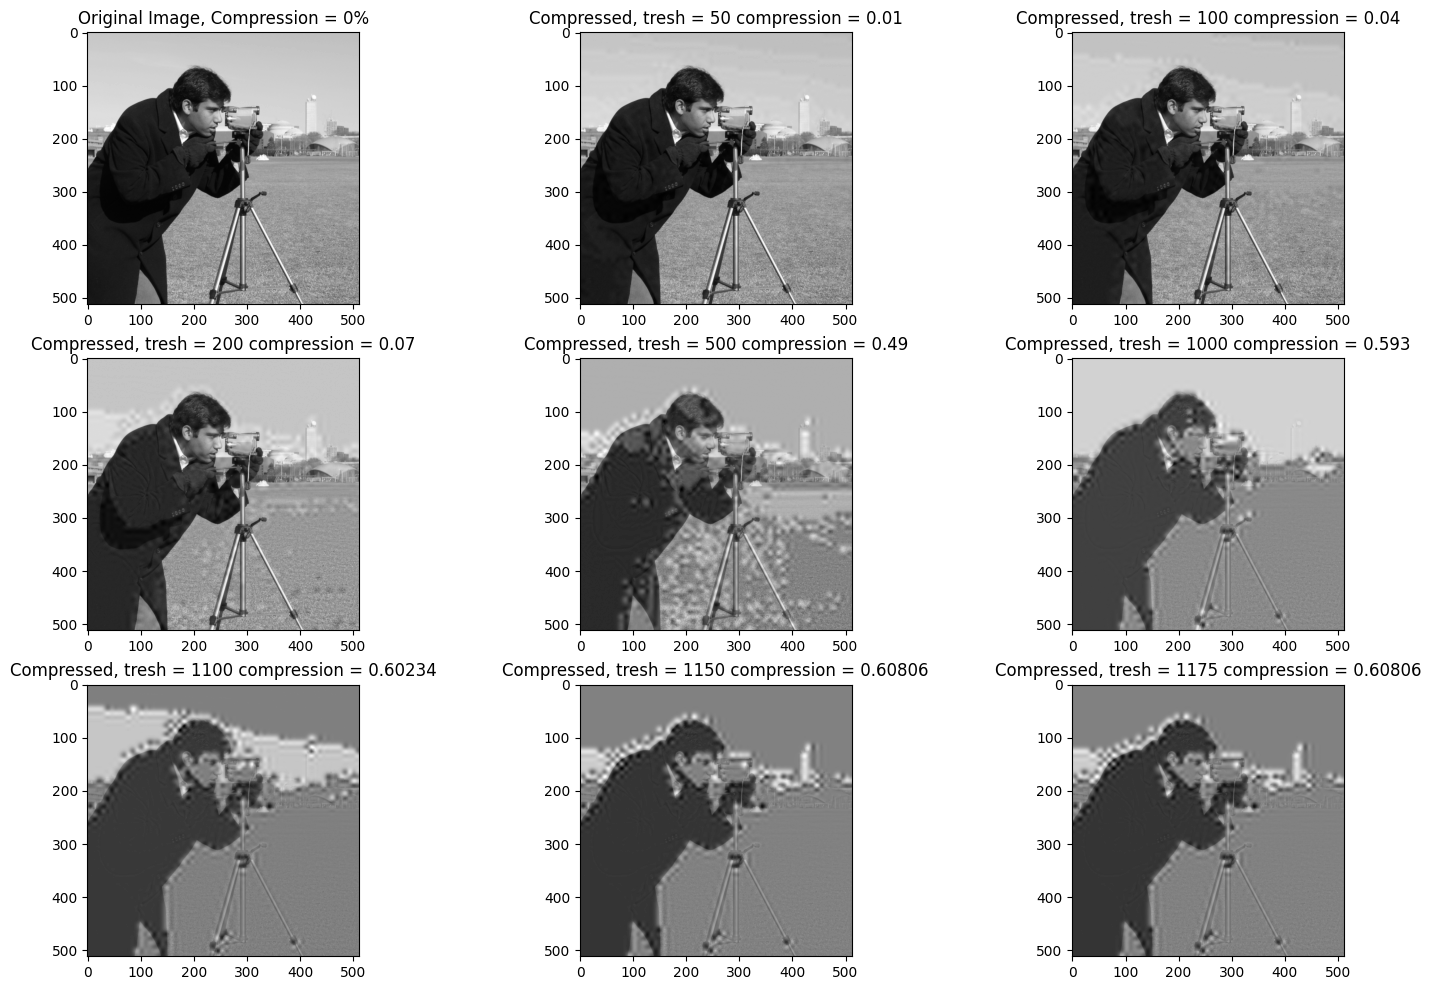

In [ ]:
rows = 3
columns = 3
fig = plt.figure(figsize=(18, 12))

fig.add_subplot(rows, columns, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image, Compression = 0%')

fig.add_subplot(rows, columns, 2)
plt.imshow(compressed2, cmap='gray')
plt.title('Compressed, tresh = 50 compression = ' +str(round(level2, 2)))
fig.add_subplot(rows, columns, 3)
plt.imshow(compressed3, cmap='gray')
plt.title('Compressed, tresh = 100 compression = ' +str(round(level3, 2)))
fig.add_subplot(rows, columns, 4)
plt.imshow(compressed4, cmap='gray')
plt.title('Compressed, tresh = 200 compression = ' +str(round(level4, 2)))
fig.add_subplot(rows, columns, 5)
plt.imshow(compressed5, cmap='gray')
plt.title('Compressed, tresh = 500 compression = ' +str(round(level5, 2)))
fig.add_subplot(rows, columns, 6)
plt.imshow(compressed6, cmap='gray')
plt.title('Compressed, tresh = 1000 compression = ' +str(round(level6,3)))
fig.add_subplot(rows, columns, 7)
plt.imshow(compressed7, cmap='gray')
plt.title('Compressed, tresh = 1100 compression = ' +str(round(level7,5)))
fig.add_subplot(rows, columns, 8)
plt.imshow(compressed8, cmap='gray')
plt.title('Compressed, tresh = 1150 compression = ' +str(round(level9,5)))
fig.add_subplot(rows, columns, 9)
plt.imshow(compressed8, cmap='gray')
plt.title('Compressed, tresh = 1175 compression = ' +str(round(level9,5)))
plt.show()


Kompresja z kwantyzacją wypada gorzej na tle kompresji z progowaniem. Dla dużych progów otrzymujemy niskiej jakości obrazki a sam poziom kompresji jest niższy niż w przypadku kompresji z progowaniem

### Eksperymenty z różnymi falkami

In [ ]:

original, compressed1, level1 = wavelet_compression_tresh(image, 500,tresh_mode = 'soft',
                                                          wavelet_type='db8', tresh_big = True, L = 3)
original, compressed2, level2 = wavelet_compression_tresh(image, 1000,tresh_mode = 'soft',
                                                          wavelet_type='db8', tresh_big = True, L = 3)
original, compressed3, level3 = wavelet_compression_tresh(image, 1175,tresh_mode = 'soft',
                                                          wavelet_type='db8', tresh_big = True, L = 3)



original, compressed4, level4 = wavelet_compression_tresh(image, 500,tresh_mode = 'soft',
                                                          wavelet_type='db4', tresh_big = True, L = 3)
original, compressed5, level5 = wavelet_compression_tresh(image, 1000,tresh_mode = 'soft',
                                                          wavelet_type='db4', tresh_big = True, L = 3)
original, compressed6, level6 = wavelet_compression_tresh(image, 1175,tresh_mode = 'soft',
                                                          wavelet_type='db4', tresh_big = True, L = 3)


original, compressed7, level7 = wavelet_compression_tresh(image, 500,tresh_mode = 'soft',
                                                          wavelet_type='db2', tresh_big = True, L = 3)
original, compressed8, level8 = wavelet_compression_tresh(image, 1000,tresh_mode = 'soft',
                                                          wavelet_type='db2', tresh_big = True, L = 3)
original, compressed9, level9 = wavelet_compression_tresh(image, 1175,tresh_mode = 'soft',
                                                          wavelet_type='db2', tresh_big = True, L = 3)


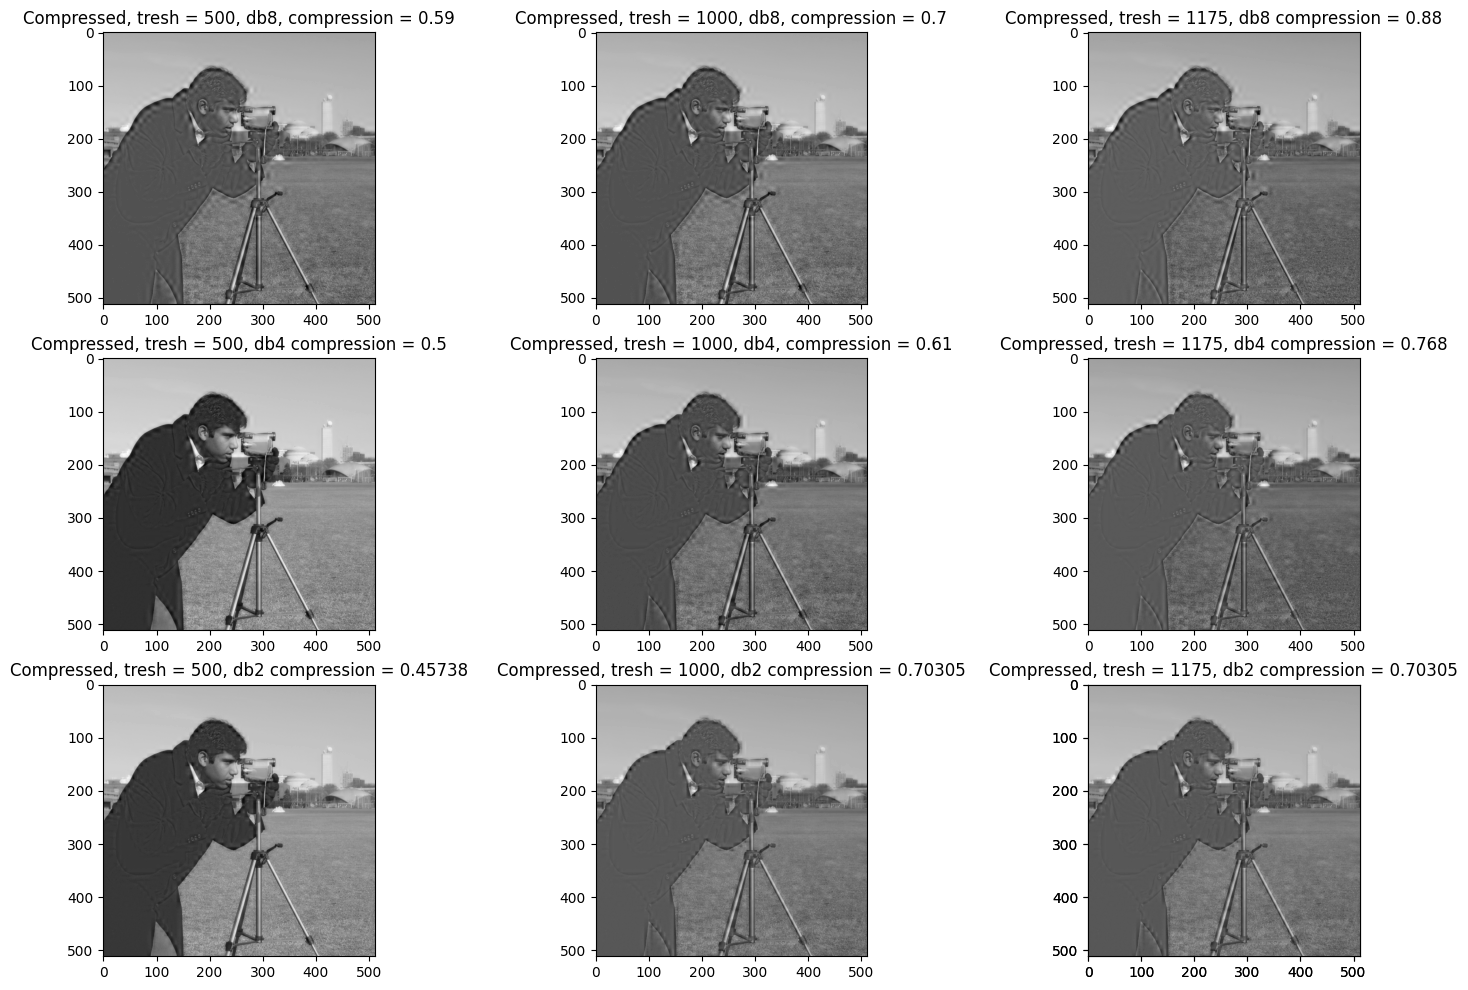

In [ ]:
rows = 3
columns = 3
fig = plt.figure(figsize=(18, 12))

fig.add_subplot(rows, columns, 1)
plt.imshow(compressed2, cmap='gray')
plt.title('Compressed, tresh = 500, db8, compression = ' +str(round(level1, 2)))

fig.add_subplot(rows, columns, 2)
plt.imshow(compressed2, cmap='gray')
plt.title('Compressed, tresh = 1000, db8, compression = ' +str(round(level2, 2)))
fig.add_subplot(rows, columns, 3)
plt.imshow(compressed3, cmap='gray')
plt.title('Compressed, tresh = 1175, db8 compression = ' +str(round(level3, 2)))
fig.add_subplot(rows, columns, 4)
plt.imshow(compressed4, cmap='gray')
plt.title('Compressed, tresh = 500, db4 compression = ' +str(round(level4, 2)))
fig.add_subplot(rows, columns, 5)
plt.imshow(compressed5, cmap='gray')
plt.title('Compressed, tresh = 1000, db4, compression = ' +str(round(level5, 2)))
fig.add_subplot(rows, columns, 6)
plt.imshow(compressed6, cmap='gray')
plt.title('Compressed, tresh = 1175, db4 compression = ' +str(round(level6,3)))
fig.add_subplot(rows, columns, 7)
plt.imshow(compressed7, cmap='gray')
plt.title('Compressed, tresh = 500, db2 compression = ' +str(round(level7,5)))
fig.add_subplot(rows, columns, 8)
plt.imshow(compressed8, cmap='gray')
plt.title('Compressed, tresh = 1000, db2 compression = ' +str(round(level9,5)))
fig.add_subplot(rows, columns, 9)
plt.imshow(compressed8, cmap='gray')
plt.title('Compressed, tresh = 1175, db2 compression = ' +str(round(level9,5)))
fig.add_subplot(rows, columns, 9)
plt.imshow(compressed8, cmap='gray')


Jak widać dl falek Dubachieus 4 i 2 otrzymujemy dla tych samych progów obrazki wyglądajęci nieco lepiej ale z zauważalnie niższym poziomem kompresji

# Podsumowanie

Przeprowadziliśmy szereg eksperymentów z dwoma różnymi metodami kompresji falkowej (progowaniem i kwantyzacją). Dla kompresji z progowaniem ponadto zbadaliśmy różnicę pomiędzy progowaniem miękkim i twardym. Przyjżeliśmy się również temu jak zastosowana falka wpływa na jakość obrazka i stopień kompresji.
Na tle przetestowanych metod kompresji najlepiej wypadła kompresja z użyciem miękkiego progowania. Otrzymaliśmy tu najlepiej wyglądające obrazki przy najwyższym poziomie kompresji. Nieco gorzej prezentują się wyniki kompresji dla kompresji z progowaniem twardym oraz z kwantyzacją. W obu przypadkach wyniki były dosyć podobne oraz gorsze niż w przypadku kompresji z progowaniem miekkim. Nasz eskperyment z wykorzystaniem różnych falek pokazał że falki db4 i db2 w porównaniu z falkami db8 dają na tych samych poziomach progowania obrazki wyższej jakości ale z zauważalnie niższym stopniem kompresji.